### Binary tree

In [1]:
class Tree_node:
    def __init__(self, key):
        self.key = key
        self.right = None
        self.left = None

let's create objects representing each node of the tree

In [2]:
node0 = Tree_node(3)

In [3]:
node1 = Tree_node(4)
node2 = Tree_node(5)

In [4]:
node0

In [5]:
node0.key

3

we can connect th node by setting the `.left` and `.right` properties of root nde

In [6]:
node0.left = node1
node0.right = node2

and we are done

In [7]:
tree = node0

tree.key

In [8]:
tree.left

In [9]:
tree.left.key

4

In [10]:
tree.right.key

5

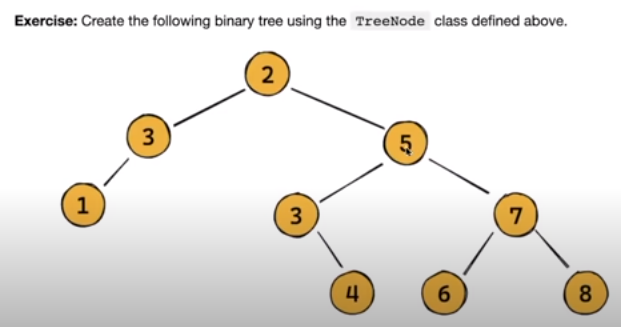

it's bit inconvenient to create tree manually connecting all nodes. let's write helper function to convert with a structure

In [11]:
tree_tuple = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [12]:
def parse_tuple(data):
    #print(data)
    if isinstance(data, tuple) and len(data) == 3:
        node = Tree_node(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = Tree_node(data)
    return node

In [13]:
tree2 = parse_tuple(tree_tuple)

In [14]:
tree2

we can now examine the tree to verify that it was constructed as expected

In [15]:
tree2.key

2

In [16]:
tree2.left.key

3

In [17]:
tree2.left.key, tree2.right.key

(3, 5)

In [18]:
def display_keys(node, space='\t', level = 0):
    #print nodes
    
    #if node is empty
    if node is None:
        print(space * level + 'X')
        return
        
    #if the node is a leaf
    if node.left is None and node.right is None:
        print(space * level + str(node.key))
        return
    
    #if node has children
    display_keys(node.right, space ,level + 2)
    print(space * level + str(node.key))
    display_keys(node.left, space, level + 2)

In [19]:
display_keys(tree2, '  ')

            8
        7
            6
    5
            4
        3
            X
2
        X
    3
        1


##### Example 2

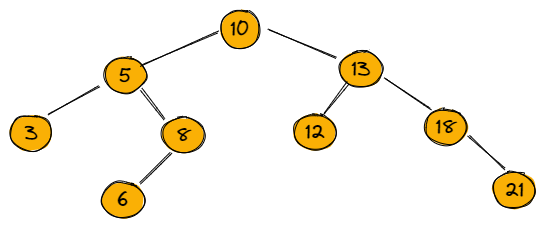

In [20]:
tree_tuple1 = (((3, 5, (6, 8, None)), 10, (12, 13, (None, 18, 21))))

In [21]:
tree3 = parse_tuple(tree_tuple1)

In [22]:
tree3

In [23]:
tree3.key

10

In [24]:
display_keys(tree3, '  ')

            21
        18
            X
    13
        12
10
            X
        8
            6
    5
        3


***
#### Trvarsing Binary Tree

frequently asked in coding interview and assessments

**Question 1** : write a function to perform the _inorder_ traversal of binary tree.
    
**Question 2**: write a function to perform the _preorder_ traversal of binary tree.

**Question 3**: write a function to perform the _postorder_ traversal of binary tree    


#### Inorder Trversal

1. left
2. root
3. right

#### Preorder Traversal

1. root
2. left
3. right

#### Postorder Traversal

1. left
2. right
3. root

implementation of inorder traversal of a binary tree

In [25]:
def traverse_in_order(node):
    if node is None:
        return []
    return(traverse_in_order(node.left) +
           [node.key] +
          traverse_in_order(node.right))

Let's try out with this tree

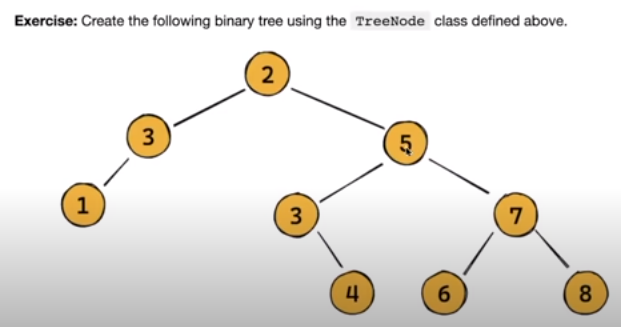

In [26]:
tree = parse_tuple(tree_tuple)

In [27]:
display_keys(tree)

						8
				7
						6
		5
						4
				3
						X
2
				X
		3
				1


In [28]:
traverse_in_order(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

implementation of preorder traversal

In [29]:
def traverse_pre_order(node):
    if node is None:
        return []
    return([node.key] +
           traverse_pre_order(node.left) +
           traverse_pre_order(node.right))

In [30]:
traverse_pre_order(tree)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

implementation postorder traversal

In [31]:
def traverse_post_order(node):
    if node is None:
        return []
    return(traverse_post_order(node.left) +
           traverse_post_order(node.right) +
          [node.key])

In [32]:
traverse_post_order(tree)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

***
### Height and Size of Binary Tree

**Question 4:** write a function to calculate the height/depth of binary tree

**Question 5:** write a function to count the number of nodes in binary tree  

In [33]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

let's compute the height of this tree

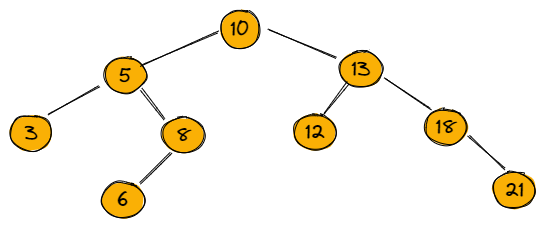

In [34]:
tree_height(tree3)

4

here's a function to count the number of nodes in a binary tree

In [35]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [36]:
tree_size(tree3)

9

As a final step, compile all the functions we've written so far as methods within the `Tree_node`. Encapsulation of data and functionality within the same class is a good practice

In [37]:
class Tree_node:
    def __init__(self, key):
        self.key = key
        self.right = None
        self.left = None
        
    #inorder traversal --> (left, root, right)    
    def traverse_in_order(node):
        if node is None:
            return []
        return(traverse_in_order(node.left) +
               [node.key] +
               traverse_in_order(node.right))
    
    #preorder traversal --> (root, left, right)
    def traverse_pre_order(node):
        if node is None:
            return []
        return([node.key] +
               traverse_pre_order(node.left) +
               traverse_pre_order(node.right))
    
    #postorder traversal --> (left, right, root)
    def traverse_post_order(node):
        if node is None:
            return []
        return(traverse_post_order(node.left) +
               traverse_post_order(node.right) +
               [node.key])
    
    #to find height of tree
    def tree_height(node):
        if node is None:
            return 0
        return 1 + max(tree_height(node.left), tree_height(node.right))
    
    #count no of elements in tree
    def tree_size(node):
        if node is None:
            return 0
        return 1 + tree_size(node.left) + tree_size(node.right)
    
    #conversion tree to tuple
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return Tree_node.to_tuple(self.left), self.key, Tree_node.to_tuple(self.right)
    
    def __str__(self):
        return "Binary Tree <{}> ".format(self.to_tuple())
    
    def __repr__(self):
        return "Binary Tree <{}> ".format(self.to_tuple())
    
    def parse_tuple(data):
        #print(data)
        if isinstance(data, tuple) and len(data) == 3:
            node = Tree_node(data[1])
            node.left = parse_tuple(data[0])
            node.right = parse_tuple(data[2])
        elif data is None:
            node = None
        else:
            node = Tree_node(data)
        return node
    
    def display_keys(node, space='\t', level = 0):
        #print nodes
        
        #if node is empty
        if node is None:
            print(space * level + 'X')
            return
        
        #if the node is a leaf
        if node.left is None and node.right is None:
            print(space * level + str(node.key))
            return
        
        #if node has children
        display_keys(node.right, space ,level + 2)
        print(space * level + str(node.key))
        display_keys(node.left, space, level + 2)

In [38]:
tree_tuple

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [39]:
tree4 = Tree_node.parse_tuple(tree_tuple)

In [40]:
tree4

Binary Tree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))> 

In [41]:
tree4.display_keys('   ')

                  8
            7
                  6
      5
                  4
            3
                  X
2
            X
      3
            1


In [42]:
tree4.tree_height()

4

In [43]:
tree4.tree_size()

9

In [44]:
tree4.traverse_in_order()

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [45]:
tree4.traverse_pre_order()

[2, 3, 1, 5, 3, 4, 7, 6, 8]

In [46]:
tree4.traverse_post_order()

[1, 3, 4, 3, 6, 8, 7, 5, 2]

In [47]:
tree4.to_tuple()

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

***
### Binary Search Tree

A binary search tree or BST is binary tree that satisfies the following conditions:

1. The left subtree of any node only contains nodes with keys less than the root node
2. The right subtree of any node only contains nodes with keys greater than the root node 

**Question 6:** write a function to check if a binary tree is BST

**Question 7:** write a function to find the maximum key in a binary tree

**Question 8:** write a function to find the minimum key in a inary tree

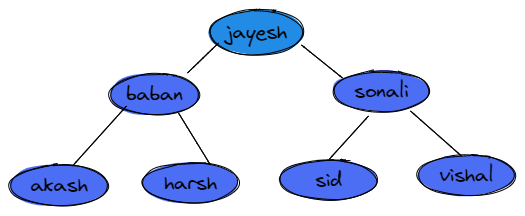

solution:

In [48]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    
    is_bst_node = (is_bst_l and is_bst_r and
                  (max_l is None or node.key > max_l) and
                  (min_r is None or node.key < min_r))
    
    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))
    
    #pint(node.key, min_key, max_key, is_bst_none)
    
    return is_bst_node, min_key, max_key

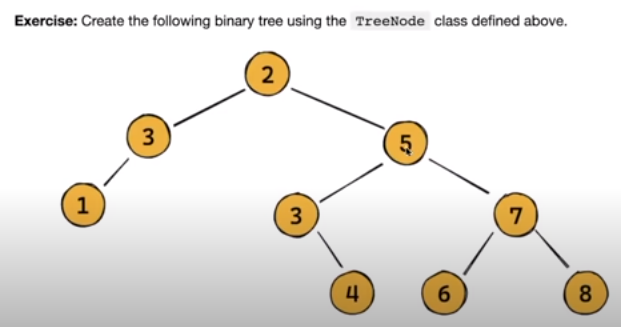

let's verify this using `is_bst`

In [49]:
tree4

Binary Tree <((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))> 

In [50]:
is_bst(tree4)

(False, 1, 8)

In [51]:
tree5 = Tree_node.parse_tuple((('akash', 'baban', 'harsh'), 'jayesh', ('sid', 'sonali', 'vishal')))

In [52]:
tree5.display_keys()

				vishal
		sonali
				sid
jayesh
				harsh
		baban
				akash


In [53]:
is_bst(tree5)

(True, 'akash', 'vishal')

#### Storing key-value pairs using BSTs

In [54]:
class BSTNode():
    def __init__(self, key, value = None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

let's try to relocate this BST with usernames as keys and user objects as values:

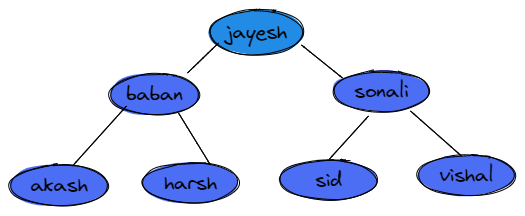

In [55]:
BSTNode

__main__.BSTNode

In [56]:
#level 0
tree = BSTNode('jayesh.username', 'jayesh')

In [57]:
#view level 0
tree.key, tree.value

('jayesh.username', 'jayesh')

In [58]:
#level 1
tree.left = BSTNode('baban.username', 'baban')
tree.left.parent = tree
tree.right = BSTNode('sonali.username', 'sonali')
tree.right.parent = tree

In [59]:
#view level 1
tree.left.key, tree.left.value, tree.right.key, tree.right.value

('baban.username', 'baban', 'sonali.username', 'sonali')

In [60]:
#level 2
tree.left.left = BSTNode('akash.username','akash')
tree.left.left.parent = tree.left

tree.left.right = BSTNode('harsh.username', 'harsh')
tree.left.right.parent = tree.left

tree.right.left = BSTNode('sid.username', 'sid')
tree.right.left.parent = tree.right

tree.right.right = BSTNode('vishal.username', 'vishal')
tree.right.right.parent = tree.right

In [61]:
#view level 2
tree.left.left.key, tree.left.left.value, tree.left.right.key, tree.left.right.value

('akash.username', 'akash', 'harsh.username', 'harsh')

In [62]:
tree.right.left.key, tree.right.left.value, tree.right.right.key, tree.right.right.value

('sid.username', 'sid', 'vishal.username', 'vishal')

In [63]:
tree.left.left.key, tree.left.left.value, tree.left.right.key, tree.left.right.value, tree.right.left.key, tree.right.left.value, tree.right.right.key, tree.right.right.value

('akash.username',
 'akash',
 'harsh.username',
 'harsh',
 'sid.username',
 'sid',
 'vishal.username',
 'vishal')

In [64]:
display_keys(tree)

				vishal.username
		sonali.username
				sid.username
jayesh.username
				harsh.username
		baban.username
				akash.username


#### Insertion into BST

**Question 9:** write a function to insert a new node into a BST

we use the BST-property to perform insertion efficiently

1. starting from the root node, we compare the key to be inserted with the current node's key
2. if the key is smaller, we recurssively insert it in the left subtree(if it exists) or attach it as the left child if no left sutree exists
3. if the key is larger, we recurssively insert it in the right subtree(if it exists) or attach it as the left child if no right sutree exists

here's the recurssive implementation of `insert`

In [65]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

let's recreate out tree.

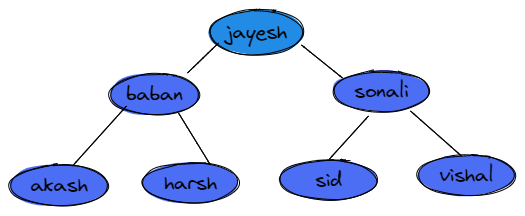

to create the first node, we can use this `insert` function with `None` as the target tree.

In [66]:
tree = insert(None, 'jayesh.username', 'jayesh')

In [67]:
tree

In [68]:
display_keys(tree)

jayesh.username


remaining nodes can be inserted into `tree`

In [69]:
insert(tree, 'baban.username', 'baban')
insert(tree, 'sonali.username', 'sonali')
insert(tree, 'akash.username', 'akash')
insert(tree, 'harsh.username', 'harsh')
insert(tree, 'sid.username', 'sid')
insert(tree, 'trupti.username', 'trupti')

In [70]:
display_keys(tree)

				trupti.username
		sonali.username
				sid.username
jayesh.username
				harsh.username
		baban.username
				akash.username


In [71]:
insert(tree, 'vishal.username', 'vishal')

In [72]:
display_keys(tree)

						vishal.username
				trupti.username
						X
		sonali.username
				sid.username
jayesh.username
				harsh.username
		baban.username
				akash.username


however, that the order of the insertion of nodes change the structure of the resulting tree.

In [73]:
tree2 = insert(None, 'akash.username', 'akash')
insert(tree2, 'baban.username', 'baban')
insert(tree2, 'harsh.username', 'harsh')
insert(tree2, 'jayesh.username', 'jayesh')
insert(tree2, 'sid.username', 'sid')
insert(tree2, 'sonali.username', 'sonali')
insert(tree2, 'vishal.username', 'vishal')

In [74]:
display_keys(tree2)

												vishal.username
										sonali.username
												X
								sid.username
										X
						jayesh.username
								X
				harsh.username
						X
		baban.username
				X
akash.username
		X


It is unbalanced and skewed tree.

In [75]:
tree_height(tree2)

7

#### Finding a node in BST

In [83]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

In [84]:
node = find(tree, 'harsh.username')

In [85]:
node.key, node.value

('harsh.username', 'harsh')

In [79]:
def find(node, value):
    if node is None:
        return None
    if value == node.value:
        return node
    if value < node.value:
        return find(node.left, value)
    if value > node.value:
        return find(node.right, value)

In [80]:
node = find(tree, 'sonali')

In [81]:
node.key, node.value

('sonali.username', 'sonali')

In [82]:
node = find(tree, 'sandesh.username')
print(node)

None


#### Updating a value in a BST

**Question 10:** write a function to update the value associated with a given key within BST

In [86]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [87]:
update(tree, 'harsh.username', ('harsh', 'harsh A', 'harsh@gmail.com'))

In [88]:
node = find(tree, 'harsh.username')
node.value

('harsh', 'harsh A', 'harsh@gmail.com')

#### list the nodes

**Question 11:** write a function to retrieve all the key-value pairs stored in BST in the sorted order of keys.

In [89]:
def list_all(node):
    if node is None:
        return None
    return list_all(node.left) + [(node.key, node.value)] + list_all(node.right)

In [90]:
#list_all(tree)

### Balanced Binary Trees

**Question 12:** write a function to determine if a binary tree is balanced

Here's a recurssive strategy:
1. ensure the left subtree is balanced.
2. ensure the right subtree is balanced.
3. ensure the difference between heights of left subtree and right subtree is not more than 1.

In [91]:
def is_balanced(node):
    if node is None:
        return True, 0
    balanced_l, height_l = is_balanced(node.left)
    balanced_r, height_r = is_balanced(node.right)
    balanced = balanced_l and balanced_r and abs(height_l - height_r) <= 1
    height = 1 + max(height_l, height_r)
    return balanced, height

The following tree is balanced:

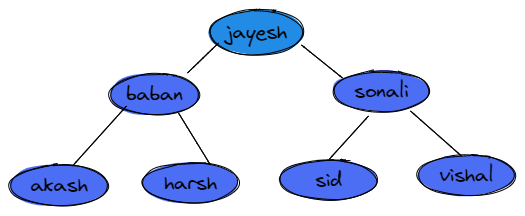

In [92]:
is_balanced(tree)

(True, 4)

The following tree is not balanced:

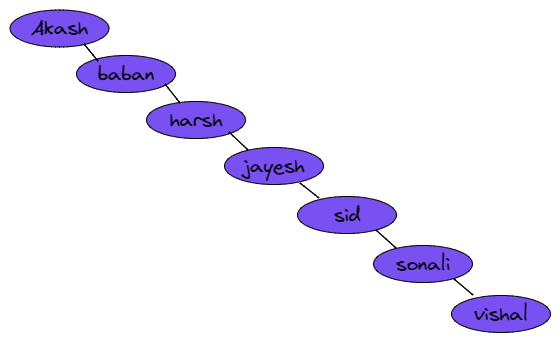

In [93]:
is_balanced(tree2)

(False, 7)

**Exercise:** Is the tree shown below balanced? Why or Why not? create tree and check if

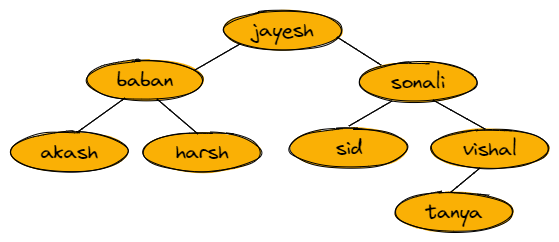

In [94]:
n_tree = (('akash', 'baban', 'harsh'), 'jayesh', ('sid', 'sonali', ('tanya', 'vishal', None)))

In [95]:
n_tree1 = Tree_node.parse_tuple(n_tree)

In [96]:
display_keys(n_tree1)

						X
				vishal
						tanya
		sonali
				sid
jayesh
				harsh
		baban
				akash


In [97]:
is_balanced(n_tree1)

(True, 4)

### Balanced Binary search Trees

**Question 13:** write a function to create a balanced BST from a sorted list/array of key-value pairs

we can use a recurssive strategy here, turning the middle element of the list into root and recurssively creating left and right subtrees

In [98]:
def make_balanced_bst(data, lo = 0, hi = None, parent = None):
    if hi is None:
        return len(data) - 1
    if lo > hi:
        return None
    
    mid = (lo + hi) // 2
    key, value = data[mid]
    
    root = BSTNode(key, value)
    root.parent = parent
    root.left = make_balanced_bst(data, lo, mid-1, root)
    root.right = make_balanced_bst(data, mid+1, hi, root)
    
    return root

In [ ]:
#data = [(user.username, user) for user in tree]

In [103]:
def balance_bst(node):
    return make_balanced_bst(list_all(node))

### Python friendly treemap

we are now ready to return to our original statement.

**Question 1:** As a senior backend engineer, you are asked to developin a fast in-memory data structure to manage profile information (username, name and email) for 100 nillion users. it should allow the following oprations to be performed efficiently.

1. **Insert** the profil information for a new user.
2. **Find** the profile information of a user, given their username
3. **Update** the profile information of a user, given their username.
4. **List** all the users of the platform, sorted by username.

we can create generic class `treemap` which supports all the operations specified in the original problem statement in a python friendly manner

In [104]:
class Treemap():
    def __init__(self):
        self.root = None
        
    def __setitem__(self, key, value):
        node = find(self.root, key)
        if not node:
            self.root = insert(self.root, key, value)
            self.root = balance_bst(self.root)
        else:
            update(self.root, key, value)
            
    def __getitem__(self, key):
        node = find(self.root, key)
        return node.value if node else None
    
    def __iter__(self):
        return (x for x in list_all(self.root))
    
    def __len__(self):
        return tree_size(self.root)
    
    def display(self):
        return display_keys(self.root)

In [105]:
treemap = Treemap()

In [106]:
print(treemap.root)

None


In [108]:
#treemap['akash'] = 'akash'